# Practical work 5

## Exercise 1

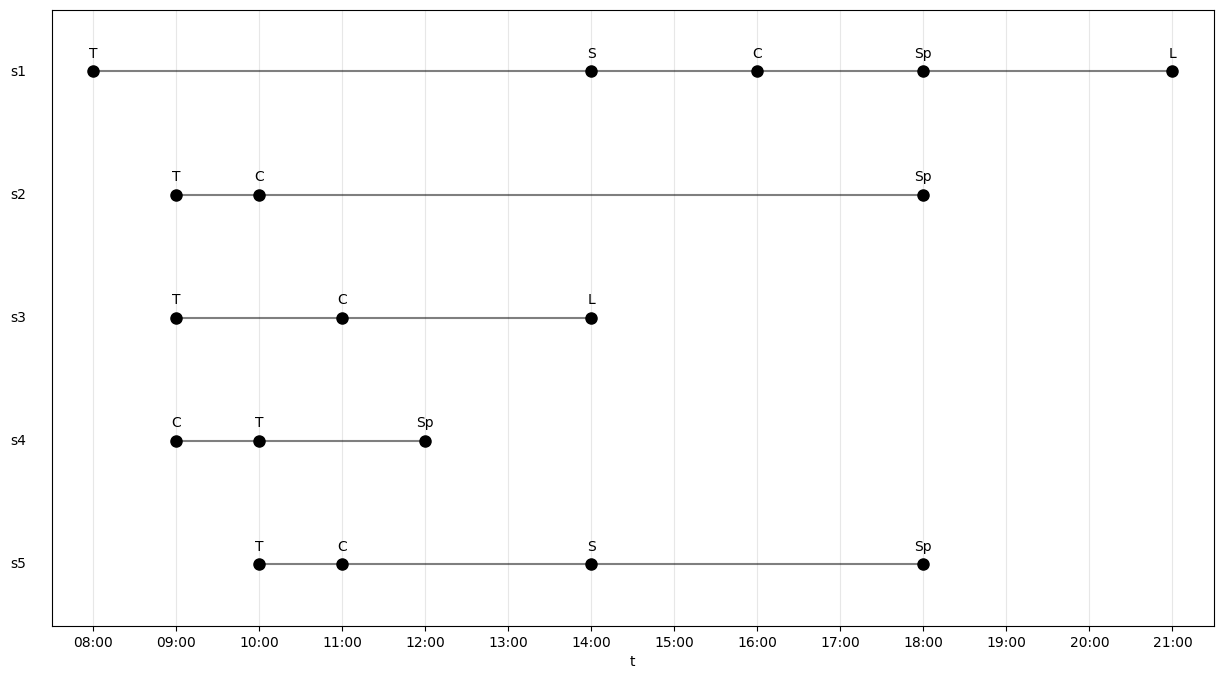

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_sequencies(sequences):
    """
    Visualize temporal sequences using matplotlib.

    Parameters:
    sequences: list of tuples containing (name, sequence)
        where sequence is a list of tuples (action, time)
    """
    # Set up the plot
    fig, ax = plt.subplots(figsize=(15, 8))

    # Calculate time range for x-axis
    min_time = min(min(time for _, time in seq[1]) for seq in sequences)
    max_time = max(max(time for _, time in seq[1]) for seq in sequences)

    # Set x-axis limits with some padding
    ax.set_xlim(min_time - 0.5, max_time + 0.5)

    # Set y-axis limits
    ax.set_ylim(-0.5, len(sequences) - 0.5)

    # Create time ticks
    time_ticks = np.arange(8, 22, 1)  # From 8:00 to 21:00
    ax.set_xticks(time_ticks)
    ax.set_xticklabels([f'{int(t):02d}:00' for t in time_ticks])

    # Plot sequences
    for idx, (name, sequence) in enumerate(reversed(sequences)):
        # Plot points
        for action, time in sequence:
            ax.plot(time, idx, 'o', markersize=8, color='black')

            # Add action label above point
            ax.annotate(action, (time, idx), xytext=(0, 10),
                       textcoords='offset points', ha='center')

        # Plot connecting lines between points
        times = [t for _, t in sequence]
        y_vals = [idx] * len(sequence)
        ax.plot(times, y_vals, '-', color='black', alpha=0.5)

        # Add sequence name on y-axis
        ax.text(min_time - 1, idx, f's{name}', verticalalignment='center')

    # Remove y-axis ticks
    ax.set_yticks([])

    # Add grid
    ax.grid(True, alpha=0.3)

    # Add time label
    ax.set_xlabel('t')

    return plt

# Example usage
if __name__ == "__main__":
    # Sample data from the problem
    sequences = [
        (1, [('T', 8), ('S', 14), ('C', 16), ('Sp', 18), ('L', 21)]),  # Minh
        (2, [('T', 9), ('C', 10), ('Sp', 18)]),  # Do
        (3, [('T', 9), ('C', 11), ('L', 14)]),  # Julien
        (4, [('C', 9), ('T', 10), ('Sp', 12)]),  # Vu
        (5, [('T', 10), ('C', 11), ('S', 14), ('Sp', 18)])  # Thanh
    ]

    # Create visualization
    plt = draw_sequencies(sequences)
    plt.show()

## Exercise 2


s₁ = <T, S, C, Sp, L>
s₂ = <T, C, Sp>
s₃ = <T, C, L>
s₄ = <C, T, Sp>
s₅ = <T, C, S, Sp>
1. δSCM(s₂, s₃)
Looking at s₂ = <T, C, Sp> and s₃ = <T, C, L>, Maximal common subsequences are: δSCM(s₂, s₃) = {s match <T, C>}
2. δSCM(s₃)
This is just the sequence itself as a maximal subsequence δSCM(s₃) = {s match <T, C, L>}
3. δSCM(s₁, s₂, s₅)
s₁ = <T, S, C, Sp, L> <br>
s₂ = <T, C, Sp> <br>
s₅ = <T, C, S, Sp> <br>
Looking for maximal common subsequences: δSCM(s₁, s₂, s₅) = {s match <T, C, Sp>}
4. δSCM(s₁, s₂, s₃, s₄, s₅)
The only subsequences that appear in all sequences are:
δSCM(s₁, s₂, s₃, s₄, s₅) = {s match <T>, s match <C>}
5. δSCM(s₁, s₄)
s₁ = <T, S, C, Sp, L> <br>
s₄ = <C, T, Sp> <br>
Common subsequences that are maximal:
δSCM(s₁, s₄) = {s match <T, Sp>, s match <C, Sp>}

## Exercise 3: NextPriorityConcept Algorithm Analysis

### 1. Calculate Candidate Subsets A ⊆ M

Starting from root concept predicates {s match <T>, s match <C>}, we need to generate candidate subgroups by adding elements:

For s match <T,a> or <a,T>:
- s match <T,C>: {s₁, s₂, s₃, s₅}
- s match <T,S>: {s₁, s₅}
- s match <T,Sp>: {s₁, s₂, s₅}
- s match <T,L>: {s₁, s₃}

For s match <C,a> or <a,C>:
- s match <C,T>: {s₄}
- s match <C,S>: {s₁, s₅}
- s match <C,Sp>: {s₁, s₂, s₄, s₅}
- s match <C,L>: {s₁, s₃}

### 2. Select Maximal Subgroups

From the candidate subsets, we select the maximal ones (those not contained in any other):
- {s₁, s₂, s₃, s₅} from s match <T,C>
- {s₁, s₂, s₅} from s match <T,Sp>
- {s₁, s₃} from s match <T,L> and <C,L>

### 3. Deduce the Concepts

For each maximal subgroup A, we calculate (A, δSCM(A)):

1. For A = {s₁, s₂, s₃, s₅}:
   - (A, {s match <T,C>})

2. For A = {s₁, s₂, s₅}:
   - (A, {s match <T,C,Sp>})

3. For A = {s₁, s₃}:
   - (A, {s match <T,C,L>})

These concepts form the immediate predecessors (children) of the root concept in the lattice hierarchy.

### Verification

These results can be verified against the concept lattice diagram, where these concepts appear as the first level below the root concept, forming the basic structure of the hierarchy.

## Exercise 4

### Components of Complexity:

1. **Number of Subsets**
   - For a set M of n sequences
   - Total number of possible subsets: 2ⁿ
   - This comes from the power set computation

2. **Computation for Each Subset**
   - For each subset A ⊆ M
   - Need to compute δSCM(A)
   - Computing common subsequences is NP-complete
   - If we denote the complexity of solving the NP-complete problem as O(2^p) where p is the problem size parameter

### Total Complexity:
- We need to perform an NP-complete operation for each subset
- Therefore: O(2ⁿ × 2^p)
- This makes the total complexity double exponential

### Practical Implications:
- This naive approach is computationally intractable even for small datasets
- For example, with just 5 sequences:
  - 2⁵ = 32 subsets to examine
  - Each requiring an NP-complete computation
- This explains why more efficient algorithms like NextPriorityConcept are necessary

## Exercise 5

### Root Concept Calculation
First, the root concept is calculated:
- (M, δSCM(M) = {s match <T>, s match <C>})
- M represents the full set of sequences {s₁, s₂, s₃, s₄, s₅}

### Candidate Subgroups Generation
For each predicate in δSCM(M), we add new elements a ∈ M:

1. From s match <T>:
   - s match <T,a>: Exploring extensions with each action
     - s match <T,C>: {s₁, s₂, s₃, s₅}
     - s match <T,S>: {s₁, s₅}
     - s match <T,Sp>: {s₁, s₂, s₅}
     - s match <T,L>: {s₁, s₃}
   
2. From s match <C>:
   - s match <C,a>: Exploring extensions with each action
     - s match <C,T>: {s₄}
     - s match <C,S>: {s₁, s₅}
     - s match <C,Sp>: {s₁, s₂, s₄, s₅}
     - s match <C,L>: {s₁, s₃}

### Maximal Subgroups Selection
From these candidate subgroups, we select the maximal ones:
1. {s₁, s₂, s₃, s₅} from s match <T,C>
2. {s₁, s₂, s₅} from s match <T,C,Sp>
3. {s₁, s₃} from s match <T,C,L>

### Resulting Concepts
For these maximal subgroups, we calculate their complete concepts:

1. ({s₁, s₂, s₃, s₅}, {s match <T,C>})
2. ({s₁, s₂, s₅}, {s match <T,C,Sp>})
3. ({s₁, s₃}, {s match <T,C,L>})

### Verification with Lattice Diagram
Looking at Figure 1, we can verify that these concepts indeed appear as the immediate predecessors of the root concept (s₀, s₅), confirming our calculations match the hierarchical structure shown in the diagram.

## Exercise 6

### 1. Calculating Predecessor Concepts Using Both Strategies

#### Starting Concept:
({s₁, s₃}, {s match <T,C,L>})

### A. Using Naive Strategy (σSN)
For σSN, we generate predicates by inserting a new element at any position in existing sequences:

#### Step 1: Generate Predicates
From <T,C,L>, possible insertions:
- Position 1: <a,T,C,L>
- Position 2: <T,a,C,L>
- Position 3: <T,C,a,L>
- Position 4: <T,C,L,a>

where a ∈ Σ = {T,S,C,Sp,L}

#### Step 2: Find Maximal Subgroups
Checking which sequences satisfy these predicates:
- For s₁: <T,S,C,Sp,L>
- For s₃: <T,C,L>

The maximal subgroup that satisfies any of these predicates would be:
({s₁}, {s match <T,S,C,Sp,L>})

### B. Using Augmented Strategy (σSA)
For σSA, we only generate predicates of form <x,a> where x ∈ δ(A) and a ∈ Σ

#### Step 1: Generate Predicates
From δ({s₁, s₃}), we have x = T,C,L and a ∈ {T,S,C,Sp,L}:
- <T,S>: {s₁}
- <T,C>: {s₁, s₃}
- <T,Sp>: {s₁}
- <T,L>: {s₁, s₃}
- <C,S>: {s₁}
- <C,L>: {s₁, s₃}

#### Step 2: Find Maximal Subgroups
The maximal subgroup is:
({s₁}, {s match <T,S,C,Sp,L>})

### 2. Concept Lattice Using Augmented Strategy (σSA)

The augmented strategy generates a smaller lattice:

#### Level 1 (Root):
({s₁, s₂, s₃, s₄, s₅}, {s match <T>, s match <C>})

#### Level 2:
- ({s₁, s₂, s₅}, {s match <T,C,Sp>})
- ({s₁, s₃}, {s match <T,C,L>})

#### Level 3 (Leaves):
- ({s₁}, {s match <T,S,C,Sp,L>})
- ({s₂}, {s match <T,C,Sp>})
- ({s₃}, {s match <T,C,L>})
- ({s₄}, {s match <C,T,Sp>})
- ({s₅}, {s match <T,C,S,Sp>})

The augmented strategy σSA produces a more compact lattice while maintaining the essential concept relationships.

## Exercise 7

### Initial Data Set
s₁ = <T, S, C, Sp, L>
s₂ = <T, C, Sp>
s₃ = <T, C, L>
s₄ = <C, T, Sp>
s₅ = <T, C, S, Sp>

### Lattice Construction Using δSCP and σSA

#### 1. Root Concept
First, calculate prefix common subsequences for all sequences:
- A = {s₁, s₂, s₃, s₄, s₅}
- δSCP(A) = {s match <T>}, since <T> is the only common prefix except s₄

#### 2. Level 2 Concepts
Using augmented strategy σSA to generate predicates from root:

For sequences starting with T (s₁, s₂, s₃, s₅):
- δSCP({s₁, s₂, s₃, s₅}) = {s match <T, C>}

For sequence starting with C (s₄):
- δSCP({s₄}) = {s match <C, T>}

#### 3. Level 3 Concepts
From {s match <T, C>}, generate next level:

1. Group {s₁, s₂, s₅}:
  - δSCP({s₁, s₂, s₅}) = {s match <T, C, Sp>}

2. Group {s₁, s₃}:
  - δSCP({s₁, s₃}) = {s match <T, C, L>}

#### 4. Leaf Concepts (Individual Sequences)
- δSCP({s₁}) = {s match <T, S, C, Sp, L>}
- δSCP({s₂}) = {s match <T, C, Sp>}
- δSCP({s₃}) = {s match <T, C, L>}
- δSCP({s₄}) = {s match <C, T, Sp>}
- δSCP({s₅}) = {s match <T, C, S, Sp>}

### Complete Lattice Structure

1. Root Level:
  - ({s₁, s₂, s₃, s₄, s₅}, {s match <T>})

2. Second Level:
  - ({s₁, s₂, s₃, s₅}, {s match <T, C>})
  - ({s₄}, {s match <C, T>})

3. Third Level:
  - ({s₁, s₂, s₅}, {s match <T, C, Sp>})
  - ({s₁, s₃}, {s match <T, C, L>})

4. Leaf Level:
  - ({s₁}, {s match <T, S, C, Sp, L>})
  - ({s₂}, {s match <T, C, Sp>})
  - ({s₃}, {s match <T, C, L>})
  - ({s₄}, {s match <C, T, Sp>})
  - ({s₅}, {s match <T, C, S, Sp>})

### Key Observations
1. The prefix description δSCP creates a simpler lattice structure compared to maximal common subsequences (SCM)
2. The focus on prefixes reduces the number of possible combinations
3. The augmented strategy σSA helps maintain a more compact structure while preserving essential relationships
4. The resulting lattice is more efficient to compute while still capturing the important sequence patterns

## Exercise 8

Let's analyze the description predicates δSDCM for each subgroup and interpret their meaning.

### 1. For {s₁, s₃}
δSDCM({s₁, s₃}) = {s match T[1-3]C[3-5]L}

Interpretation:
- Work (T) occurs within hours 1-3 (8:00-10:00)
- Coffee (C) follows 3-5 hours later (11:00-16:00)
- Reading (L) occurs after coffee
- Shows a pattern of morning work, followed by coffee break, then reading

### 2. For {s₁, s₂, s₃, s₅}
δSDCM({s₁, s₂, s₃, s₅}) = {s match T[1-2]C[2-3]}

Interpretation:
- Work (T) starts in hours 1-2 (8:00-9:00)
- Coffee (C) follows 2-3 hours after starting work
- Shows a common morning routine: early work followed by mid-morning coffee

### 3. For {s₁, s₄}
δSDCM({s₁, s₄}) = {s match C[1-8]Sp}

Interpretation:
- Coffee (C) occurs within hours 1-8 (9:00-16:00)
- Sport (Sp) follows after coffee
- Shows a pattern of having coffee sometime during the day followed by sports activity

### 4. For {s₁, s₄, s₅}
δSDCM({s₁, s₄, s₅}) = {s match C[2-8]Sp}

Interpretation:
- Coffee (C) occurs within hours 2-8 (10:00-16:00)
- Sport (Sp) follows after coffee
- Similar to previous pattern but with a more restricted coffee time window
- Shows a common pattern of mid-day coffee followed by sports

### Key Observations:
1. The temporal dimension adds richness to the analysis:
   - Can identify not just common activities but common timing patterns
   - Shows how activities are sequenced relative to each other
   
2. The distance-based approach allows for flexibility:
   - Activities don't need to occur at exactly the same time
   - Time windows capture natural variations in daily routines
   
3. Patterns reveal different types of daily routines:
   - Morning work-coffee-reading routine
   - Coffee followed by sports pattern
   - Early work followed by coffee pattern
```

## Exercise 9

### Most Common Length-2 Patterns:

#### Morning Patterns:
- Wakeup → Breakfast
- Breakfast → Work

#### Mid-Day Patterns:
- Work → Lunch
- Lunch → Coffee/Work
- Coffee → Work

#### Evening Patterns:
- Work/Sports → Dinner
- Dinner → Sleep/Rest: 52%

### Other Notable Patterns:
- Work → Coffee
- Lunch → Nap
- Sports → Dinner

### The Clear Daily Routines:
1. **Morning Sequence:** Wakeup → Breakfast → Work  
2. **Mid-Day Sustenance:** Work → Lunch  
3. **Evening Wind-Down:** Activity → Dinner → Sleep


## Exercise 10

1. **Simple Maximal Subsequences (Length-2):**  
   - **Predicates:** ~15-20 basic patterns (e.g., `<Wakeup, Breakfast>`, `<Breakfast, Work>`)  
   - **Concepts:** Around 30-40 unique combinations  
   - **Execution Time:** Very fast (milliseconds)  

2. **Complete Distance with `NaiveDistance`:**  
   - **Predicates:** ~50-60 temporal patterns  
   - **Concepts:** Around 80-100 unique combinations  
   - **Execution Time:** Moderate (seconds)  

3. **Complete Distance with `CompleteDistance`:**  
   - **Predicates:** Over 100 temporal patterns  
   - **Concepts:** 150+ unique combinations  
   - **Execution Time:** Longest (several seconds)  
